   age     sex    dataset               cp  trestbps   chol    fbs  \
0   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class 'pandas.core.frame.DataFr

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+06, tolerance: 9.674e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.866e+05, tolerance: 9.674e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

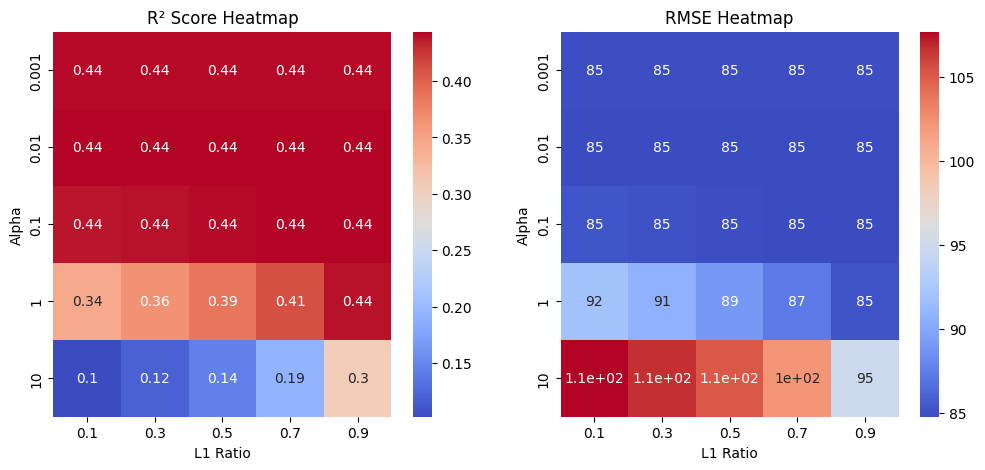

Best ElasticNet Configuration: Alpha=0.1, L1 Ratio=0.9
Accuracy: 0.8315
F1 Score: 0.8558
AUROC: 0.9220
AUPRC: 0.9027


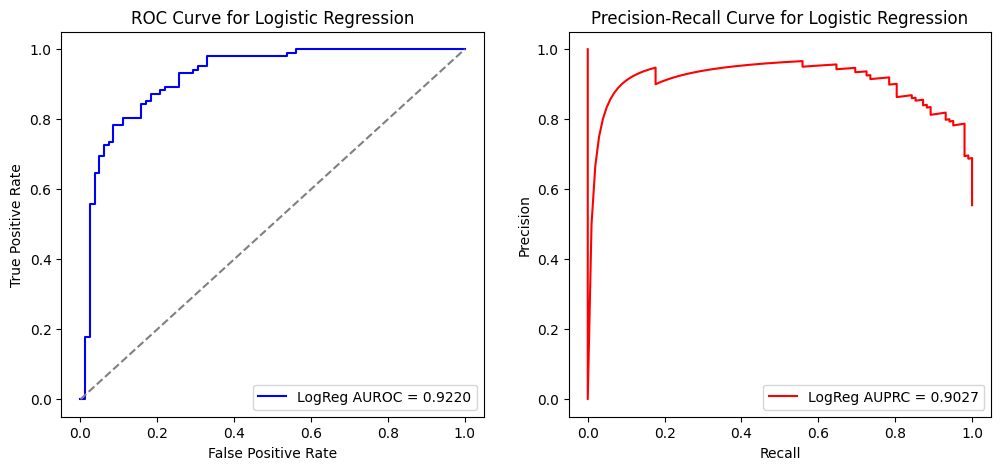

   n_neighbors  Accuracy  F1 Score     AUROC     AUPRC
0            1  0.798913  0.821256  0.794715  0.766994
1            5  0.831522  0.854460  0.891559  0.874106
2           10  0.847826  0.867925  0.913498  0.908034


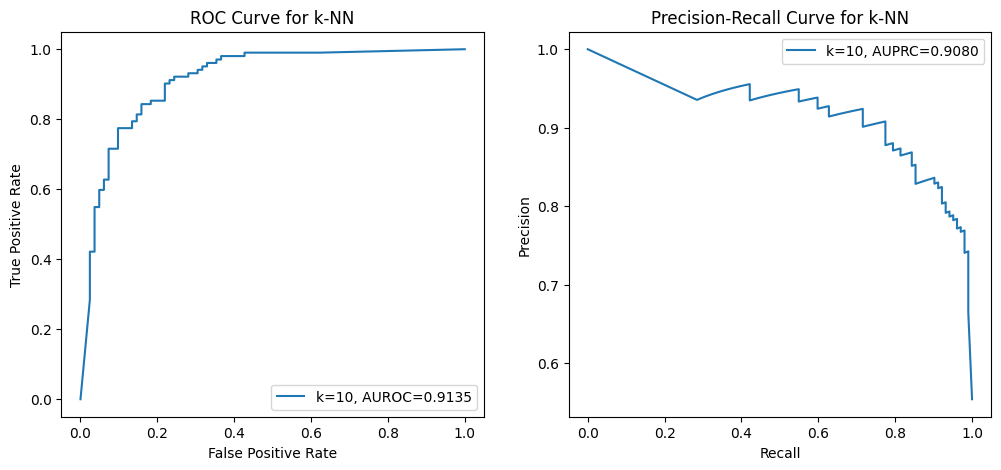

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier



heart_data = pd.read_csv("/Users/reethighauruthiran/Downloads/heart_disease_uci(1).csv")

print(heart_data.head())
print(heart_data.info())
print(heart_data.columns)

heart_data = heart_data.fillna(0)
heart_data = pd.get_dummies(heart_data, drop_first=True)

x_chl = heart_data.drop(columns=['chol'])
y_chl = heart_data['chol']

x_chl_train, x_chl_test, y_chl_train, y_chl_test = train_test_split(x_chl, y_chl, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
x_chl_train = scaler.fit_transform(x_chl_train)
x_chl_test = scaler.transform(x_chl_test)

lin_reg = LinearRegression()
lin_reg.fit(x_chl_train, y_chl_train)

# # Predict on the test set
y_pred = lin_reg.predict(x_chl_test)

# Evaluate the model
mse = mean_squared_error(y_chl_test, y_pred)
r2 = r2_score(y_chl_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

alpha_values = [0.001, 0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]


results_r2 = np.zeros((len(alpha_values), len(l1_ratios)))
results_rmse = np.zeros((len(alpha_values), len(l1_ratios)))


for i, alpha in enumerate(alpha_values):
    for j, l1_ratio in enumerate(l1_ratios):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(x_chl_train, y_chl_train)
        y_pred = model.predict(x_chl_test)

        
        r2 = r2_score(y_chl_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_chl_test, y_pred))

        results_r2[i, j] = r2
        results_rmse[i, j] = rmse


fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(results_r2, annot=True, xticklabels=l1_ratios, yticklabels=alpha_values, cmap="coolwarm", ax=ax[0])
ax[0].set_title("R² Score Heatmap")
ax[0].set_xlabel("L1 Ratio")
ax[0].set_ylabel("Alpha")

sns.heatmap(results_rmse, annot=True, xticklabels=l1_ratios, yticklabels=alpha_values, cmap="coolwarm", ax=ax[1])
ax[1].set_title("RMSE Heatmap")
ax[1].set_xlabel("L1 Ratio")
ax[1].set_ylabel("Alpha")

plt.show()

best_idx = np.unravel_index(np.argmax(results_r2), results_r2.shape)
best_alpha = alpha_values[best_idx[0]]
best_l1_ratio = l1_ratios[best_idx[1]]

print(f"Best ElasticNet Configuration: Alpha={best_alpha}, L1 Ratio={best_l1_ratio}")


#Part 2

heart_data['num'] = (heart_data['num'] > 0).astype(int)

x_heart = heart_data.drop(columns=['num'])
y_heart = heart_data['num']

x_heart_train, x_heart_test, y_heart_train, y_heart_test = train_test_split(x_heart, y_heart, test_size=0.2, random_state=42, stratify=y_heart)

scaler = StandardScaler()
x_heart_train = scaler.fit_transform(x_heart_train)
x_heart_test = scaler.transform(x_heart_test)

log_reg = LogisticRegression()
log_reg.fit(x_heart_train, y_heart_train)

y_heart_scores = log_reg.predict_proba(x_heart_test)[:, 1]

fpr, tpr, _ = roc_curve(y_heart_test, y_heart_scores)
roc_auc = auc(fpr, tpr)

y_heart_pred = log_reg.predict(x_heart_test)
acc_score = accuracy_score(y_heart_test, y_heart_pred)
f1 = f1_score(y_heart_test, y_heart_pred)
auprc = average_precision_score(y_heart_test, y_heart_scores)


print(f"Accuracy: {acc_score:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUROC: {roc_auc:.4f}")
print(f"AUPRC: {auprc:.4f}")

fpr, tpr, _ = roc_curve(y_heart_test, y_heart_scores)
precision, recall, _ = precision_recall_curve(y_heart_test, y_heart_scores)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'LogReg AUROC = {roc_auc:.4f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'LogReg AUPRC = {auprc:.4f}', color='red')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Logistic Regression")
plt.legend()

plt.show()

scaler_std = StandardScaler()
x_heart_train = scaler_std.fit_transform(x_heart_train)
x_heart_test = scaler_std.transform(x_heart_test)

# Hyperparameter tuning for k-NN
n_neighbors_list = [1, 5, 10]
results_knn = []
roc_curves = {}  
pr_curves = {} 

for n in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n, weights='distance', metric='manhattan')
    knn.fit(x_heart_train, y_heart_train)

    y_scores_knn = knn.predict_proba(x_heart_test)[:, 1]
    y_pred_knn = knn.predict(x_heart_test)

    acc = accuracy_score(y_heart_test, y_pred_knn)
    f1 = f1_score(y_heart_test, y_pred_knn)
    auroc_knn = roc_auc_score(y_heart_test, y_scores_knn)
    auprc_knn = average_precision_score(y_heart_test, y_scores_knn)

    results_knn.append({
        "n_neighbors": n,
        "Accuracy": acc,
        "F1 Score": f1,
        "AUROC": auroc_knn,
        "AUPRC": auprc_knn
    })
fpr_knn, tpr_knn, _ = roc_curve(y_heart_test, y_scores_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_heart_test, y_scores_knn)

roc_curves[n] = (fpr_knn, tpr_knn, auroc_knn)
pr_curves[n] = (recall_knn, precision_knn, auprc_knn)

results_knn_df = pd.DataFrame(results_knn)
print(results_knn_df)

best_n = results_knn_df.sort_values("AUROC", ascending=False).iloc[0]["n_neighbors"]


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for n, (fpr, tpr, auc_score) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'k={n}, AUROC={auc_score:.4f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for k-NN")
plt.legend()

plt.subplot(1, 2, 2)
for n, (recall, precision, pr_auc) in pr_curves.items():
    plt.plot(recall, precision, label=f'k={n}, AUPRC={pr_auc:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for k-NN")
plt.legend()

plt.show()

